In [1]:
import tensorflow as tf

x = tf.constant(35, name='x')
print(x)
y = tf.Variable(x + 5, name='y')

with tf.Session() as session:
    merged = tf.summary.merge_all()
    writer = tf.summary.FileWriter("/tmp/basic", session.graph)
    model =  tf.global_variables_initializer()
    session.run(model)
    print(session.run(y))

Tensor("x:0", shape=(), dtype=int32)
40


In [ ]:
import tensorflow as tf
 
# Build a graph
a = tf.constant(5.0)
b = tf.constant(6.0)
c = a * b

Epoch 0: 2069.6319333978354
Epoch 1: 2117.0123581953535
Epoch 2: 2092.302723001866
Epoch 3: 2068.5080461938464
Epoch 4: 2045.591184088162
Epoch 5: 2023.5146448101316
Epoch 6: 2002.2447619835536
Epoch 7: 1981.748338803649
Epoch 8: 1961.9944411260742
Epoch 9: 1942.9520116143283
Epoch 10: 1924.5930823644712
Epoch 11: 1906.8898800636332
Epoch 12: 1889.8164505837929
Epoch 13: 1873.347133841543
Epoch 14: 1857.4588400604468
Epoch 15: 1842.1278742424079
Epoch 16: 1827.332495119955
Epoch 17: 1813.0520579712022
Epoch 18: 1799.2660847636982
Epoch 19: 1785.9562132299961
Epoch 20: 1773.1024853109072
Epoch 21: 1760.689129482884
Epoch 22: 1748.6984157081515
Epoch 23: 1737.1138680398553
Epoch 24: 1725.920873066732
Epoch 25: 1715.1046249579008
Epoch 26: 1704.6500954309377
Epoch 27: 1694.5447134910141
Epoch 28: 1684.7746311347667
Epoch 29: 1675.328450968245
Epoch 30: 1666.1935385839038
Epoch 31: 1657.3584002084322
Epoch 32: 1648.8122658529207
Epoch 33: 1640.5440742547091
Epoch 34: 1632.5446836102221
Epo

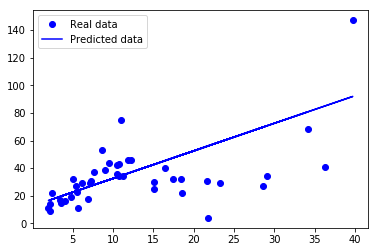

X: [[  6.2]
 [  9.5]
 [ 10.5]
 [  7.7]
 [  8.6]
 [ 34.1]
 [ 11. ]
 [  6.9]
 [  7.3]
 [ 15.1]
 [ 29.1]
 [  2.2]
 [  5.7]
 [  2. ]
 [  2.5]
 [  4. ]
 [  5.4]
 [  2.2]
 [  7.2]
 [ 15.1]
 [ 16.5]
 [ 18.4]
 [ 36.2]
 [ 39.7]
 [ 18.5]
 [ 23.3]
 [ 12.2]
 [  5.6]
 [ 21.8]
 [ 21.6]
 [  9. ]
 [  3.6]
 [  5. ]
 [ 28.6]
 [ 17.4]
 [ 11.3]
 [  3.4]
 [ 11.9]
 [ 10.5]
 [ 10.7]
 [ 10.8]
 [  4.8]] X*w+b [[ 24.95303833]
 [ 31.54469019]
 [ 33.54216045]
 [ 27.94924372]
 [ 29.74696696]
 [ 80.68245858]
 [ 34.54089558]
 [ 26.35126752]
 [ 27.15025562]
 [ 42.73052365]
 [ 70.69510728]
 [ 16.9631573 ]
 [ 23.95430321]
 [ 16.56366324]
 [ 17.56239837]
 [ 20.55860376]
 [ 23.35506213]
 [ 16.9631573 ]
 [ 26.95050859]
 [ 42.73052365]
 [ 45.52698201]
 [ 49.3221755 ]
 [ 84.87714612]
 [ 91.86829203]
 [ 49.52192253]
 [ 59.10977978]
 [ 36.93785989]
 [ 23.75455618]
 [ 56.11357439]
 [ 55.71408033]
 [ 30.54595506]
 [ 19.75961566]
 [ 22.55607402]
 [ 69.69637215]
 [ 47.32470524]
 [ 35.14013666]
 [ 19.36012161]
 [ 36.33861881]
 [ 3

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import xlrd

#import utils

DATA_FILE = 'theft.xlsx'

# Step 1: read in data from the .xls file
book = xlrd.open_workbook(DATA_FILE, encoding_override="utf-8")
sheet = book.sheet_by_index(1)
data = np.asarray([sheet.row_values(i) for i in range(1, sheet.nrows)])
n_samples = sheet.nrows - 1


# Step 2: create placeholders for input X (number of fire) and label Y (number of theft)
X = tf.placeholder(tf.float32, name='X')
Y = tf.placeholder(tf.float32, name='Y')

# Step 3: create weight and bias, initialized to 0
w = tf.Variable(0.0, name='weights')
b = tf.Variable(0.0, name='bias')

# Step 4: build model to predict Y
Y_predicted = X * w + b 

# Step 5: use the square error as the loss function
loss = tf.square(Y - Y_predicted, name='loss')
# loss = utils.huber_loss(Y, Y_predicted)

# Step 6: using gradient descent with learning rate of 0.01 to minimize loss
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001).minimize(loss)

with tf.Session() as sess:
	# Step 7: initialize the necessary variables, in this case, w and b
	sess.run(tf.global_variables_initializer()) 
	
	writer = tf.summary.FileWriter('./graphs/linear_reg', sess.graph)
	
	# Step 8: train the model
	for i in range(50): # train the model 100 epochs
		total_loss = 0
		for x, y in data:
			# Session runs train_op and fetch values of loss
			_, l = sess.run([optimizer, loss], feed_dict={X: x, Y:y}) 
			total_loss += l
		print('Epoch {0}: {1}'.format(i, total_loss/n_samples))

	# close the writer when you're done using it
	writer.close() 
	
	# Step 9: output the values of w and b
	w, b = sess.run([w, b]) 

# plot the results
X, Y = data[:,[0]], data[:,[1]]
plt.plot(X, Y, 'bo', label='Real data')
plt.plot(X, X * w + b, 'b', label='Predicted data')
plt.legend()
plt.show()
print("X:",X,"X*w+b",X * w + b,"w:",w,"b:",b)
print(data)